# 19 TEXT CLASSIFICATION AND SENTIMENT ANALYSIS 
Improving Customer Satisfaction through Automated Review Sentiment Analysis

### Overview :
You are a product manager at an e-commerce company like Amazon. Your company receives thousands of customer reviews daily for various products. While ratings are available, they don’t always capture customer sentiment accurately — especially when the text and rating conflict.


### Business Problem:
##### Your goal is to build an automated Sentiment Analysis System to classify incoming product reviews as Positive or Negative. This will help:
- Monitor product performance in real-time
- Identify products with sudden spikes in negative feedback
- Improve customer satisfaction by addressing complaints faster


### Dataset :
- Each row is one Amazon customer review for some product.
- The dataset has been pre-labeled — so you already know if the review is positive or negative.
- This is a typical sentiment analysis dataset, often used for training or testing natural language processing (NLP) models.


##### Rows:
- 10,000 customer reviews
##### Columns:
- 1.	label
    - Type: Text (Categorical)
    - Values: pos (positive) or neg (negative)
    - What it means: The sentiment of the review — whether the customer’s feedback is positive or negative.
- 2.	review
    - Type: Text
    - Values: Actual text of the review written by the customer.
    - What it means: What the customer said about the product in their own words — for example: “Excellent Soundtrack! I love it!”


### Tasks
- Data Cleaning: Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).
- Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.
- Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.
- Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-score.


In [8]:
!pip install wordcloud

   ---------------------------------------- 0.0/307.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/307.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/307.2 kB 162.5 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/307.2 kB 281.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/307.2 kB 654.9 kB/s eta 0:00:01
   ------------------------------------- -- 286.7/307.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  307.2/307.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 307.2/307.2 kB 1.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import re
import string

df = pd.read_csv('amazonreviews.tsv', sep='\t')
print(df.head())

  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
df.shape

(10000, 2)

In [10]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


df['clean_review'] = df['review'].apply(clean_text)

#### Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.

In [12]:
# Visualization libraries 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
print(df['label'].value_counts()) # Sentiment Distribution

label
neg    5097
pos    4903
Name: count, dtype: int64


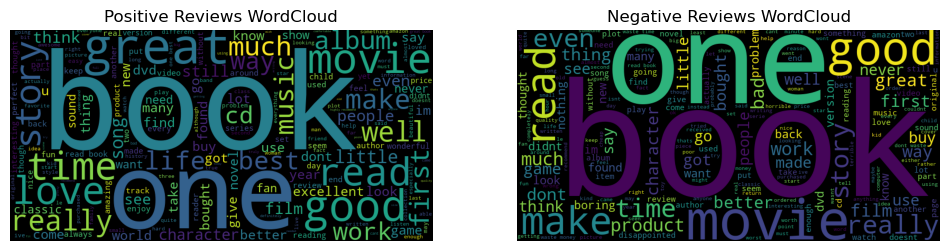

In [14]:
# WordClouds
pos_text = ' '.join(df[df['label']=='pos']['clean_review'])
neg_text = ' '.join(df[df['label']=='neg']['clean_review'])

wc_pos = WordCloud(width=800, height=400).generate(pos_text)
wc_neg = WordCloud(width=800, height=400).generate(neg_text)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.title('Positive Reviews WordCloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.title('Negative Reviews WordCloud')
plt.axis('off')
plt.show()

#### Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.

In [15]:
# ML Libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [16]:
# 4. Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['clean_review']
y = df['label'].map({'pos':1, 'neg':0})

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y) # Train-Test Split

In [18]:
# Model Training
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000) # Logistic Regression
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train) # SVM Model

C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [20]:
# Evaluation
# Logistic Regression
lr_pred = lr_model.predict(X_test)
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# SVM
svm_pred = svm_model.predict(X_test)
print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))



--- Logistic Regression Results ---
Accuracy: 0.8475
F1 Score: 0.8438300051203277
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1019
           1       0.85      0.84      0.84       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


--- SVM Results ---
Accuracy: 0.8325
F1 Score: 0.829862874555612
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1019
           1       0.83      0.83      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



#### Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-sco

In [21]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(lr_model, X_tfidf, y, cv=5, scoring='accuracy')

# F1-score (weighted for balanced evaluation)
f1_scores = cross_val_score(lr_model, X_tfidf, y, cv=5, scoring='f1_weighted')

print("Cross Validation Accuracy of Linear Regression:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

print("\nCross Validation F1 Scores of Linear Regression:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())

Cross Validation Accuracy of Linear Regression: [0.8485 0.825  0.817  0.8255 0.848 ]
Mean Accuracy: 0.8328

Cross Validation F1 Scores of Linear Regression: [0.84851125 0.82496217 0.81681079 0.82551706 0.84801459]
Mean F1 Score: 0.8327631742480527


In [22]:
accuracy_scores = cross_val_score(svm_model, X_tfidf, y, cv=5, scoring='accuracy')

# F1-score (weighted for balanced evaluation)
f1_scores = cross_val_score(svm_model, X_tfidf, y, cv=5, scoring='f1_weighted')

print("Cross Validation Accuracy of SVM:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

print("\nCross Validation F1 Scores of SVM:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())

C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_clas

Cross Validation Accuracy of SVM: [0.851  0.8105 0.8125 0.818  0.835 ]
Mean Accuracy: 0.8254000000000001

Cross Validation F1 Scores of SVM: [0.85099374 0.81051635 0.81241765 0.81801747 0.8350165 ]
Mean F1 Score: 0.8253923415868668


C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
